In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("1_Wine.csv")

In [5]:
df.keys()

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [14]:
print(df['Alcohol'])

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64


In [10]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [12]:
print(df.columns)


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')


In [16]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [18]:
print(df.isnull().sum())       #checking is null

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [20]:
X = df.drop('Customer_Segment', axis=1)  # Features
y = df['Customer_Segment']  # Target variable

In [22]:
for col in X.columns:
    sc = StandardScaler()                                     #Standardize features by removing the mean and scaling to unit variance.z = (x - u) / s  mean=0, Stddeviation=1
    X[col] = sc.fit_transform(X[[col]])                        #Fit to data, then transform it.Compute the mean and std to be used for later scaling.

In [24]:
X.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [26]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [28]:
pca = PCA()
X_pca = pca.fit_transform(X)

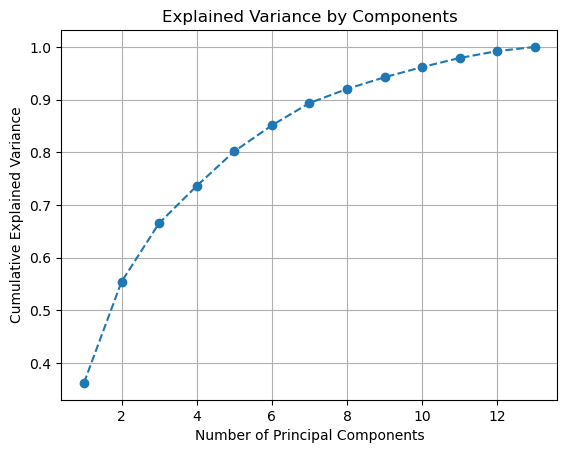

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA model
pca = PCA()
pca.fit(X)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio.cumsum(),
    marker='o',
    linestyle='--'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [36]:
n_components = 12  # Choose the desired number of principal components you want to reduce a dimention to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


In [38]:
X_pca.shape

(178, 12)

In [40]:
X.shape

(178, 13)

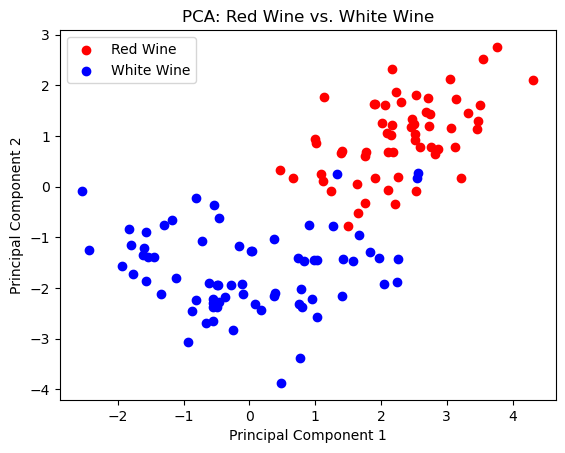

In [42]:
red_indices = y[y == 1].index
white_indices = y[y == 2].index

plt.scatter(X_pca[red_indices, 0], X_pca[red_indices, 1], c='red', label='Red Wine')
plt.scatter(X_pca[white_indices, 0], X_pca[white_indices, 1], c='blue', label='White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Red Wine vs. White Wine')
plt.show()

In [44]:
#Conclusion: Here we have reduce the dimention now we can able to apply any algorithm like classification, Regression etc.